<a href="https://colab.research.google.com/github/ayushanand18/ocean-research-py/blob/main/notebooks/data_collection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Collecting and experimenting with data
Let us first collect some data, and look at how it happens.

## installing pyobis

In [6]:
try:
  import pyobis
except:
  %pip -q install pyobis
  import pyobis

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pyobis.occurrences import OccQuery

In [8]:
try:
  import geopandas as gpd
except:
  %pip -q install geopandas
  import geopandas as gpd

I think these much libraries are fine for us, we'll install/import more if needed.

## grabbing some initial marine data

In [9]:
occ = OccQuery()

In [10]:
# use this function to fetch for any occurrence records, it returns a pandas dataframe
df = occ.search(startdate="1999-01-01", enddate="2017-12-31", geometry="POLYGON ((17.4024 -42.7827,	18.1055 -56.2070, 45.2930 -56.0765, 43.7695 -43.3815, 17.4024 -42.7827))")


Fetched 303726 records.


In [11]:
df.head()

,date_year,scientificNameID,year,scientificName,dropped,aphiaID,decimalLatitude,phylumid,familyid,basisOfRecord,...,associatedReferences,type,georeferencedDate,ownerInstitutionCode,identificationRemarks,nomenclaturalCode,datasetName,organismRemarks,taxonConceptID,infraspecificEpithet
0,2013,urn:lsid:marinespecies.org:taxname:212656,2013,Aptenodytes patagonicus,False,212656,-46.393500,1821,196034.0,MachineObservation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2009,urn:lsid:marinespecies.org:taxname:231413,2009,Mirounga leonina,False,231413,-47.466495,1821,136976.0,MachineObservation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,urn:lsid:marinespecies.org:taxname:231404,2013,Arctocephalus gazella,False,231404,-47.027800,1821,231386.0,MachineObservation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010,urn:lsid:marinespecies.org:taxname:231404,2010,Arctocephalus gazella,False,231404,-45.870668,1821,231386.0,MachineObservation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011,urn:lsid:marinespecies.org:taxname:231413,2011,Mirounga leonina,False,231413,-50.512590,1821,136976.0,MachineObservation,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


let us see the species distribution

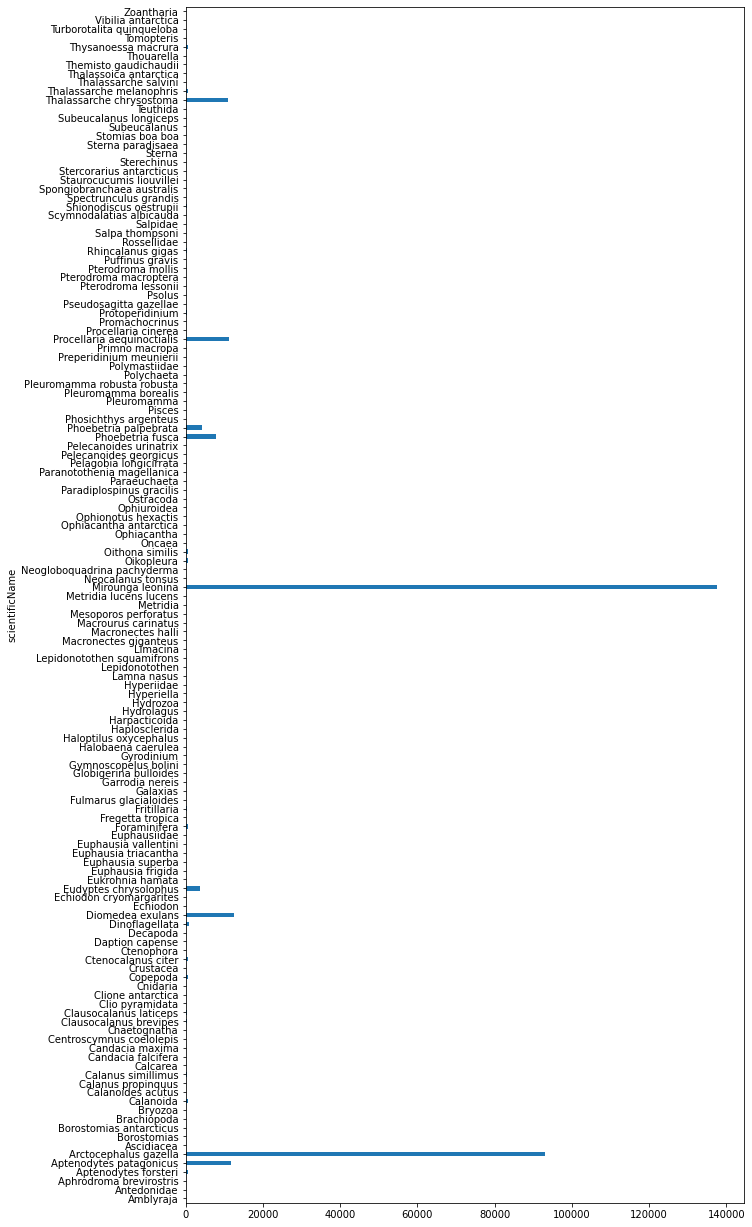

In [12]:
df.groupby("scientificName").occurrenceID.count().plot.barh(figsize=(10,22));

let's see the columns and we'll select our interest later.

In [13]:
l = list(df.columns)
l.sort()
l

['absence',
 'aphiaID',
 'associatedReferences',
 'basisOfRecord',
 'bathymetry',
 'bibliographicCitation',
 'brackish',
 'catalogNumber',
 'category',
 'class',
 'classid',
 'collectionCode',
 'continent',
 'coordinatePrecision',
 'coordinateUncertaintyInMeters',
 'country',
 'county',
 'datasetID',
 'datasetName',
 'dataset_id',
 'dateIdentified',
 'date_end',
 'date_mid',
 'date_start',
 'date_year',
 'day',
 'decimalLatitude',
 'decimalLongitude',
 'depth',
 'dropped',
 'dynamicProperties',
 'eventDate',
 'eventID',
 'eventRemarks',
 'eventTime',
 'family',
 'familyid',
 'fieldNumber',
 'flags',
 'footprintWKT',
 'genus',
 'genusid',
 'geodeticDatum',
 'georeferenceProtocol',
 'georeferenceRemarks',
 'georeferencedDate',
 'gigaclass',
 'gigaclassid',
 'hab',
 'id',
 'identificationQualifier',
 'identificationRemarks',
 'identifiedBy',
 'individualCount',
 'infraclass',
 'infraclassid',
 'infrakingdom',
 'infrakingdomid',
 'infraorder',
 'infraorderid',
 'infraphylum',
 'infraphylum

let's see the taxonomic coverage.

In [14]:
cnt=0
for i in df["scientificName"].unique():
  if len(str(df[df["scientificName"]==i].vernacularName.unique()[-1]))>3:
    print(i, " -> ", df[df["scientificName"]==i].vernacularName.unique()[-1])
  else:
    cnt+=1
print(f"{cnt} are nan values")

Mirounga leonina  ->  Southern elephant seal
Diomedea exulans  ->  Wandering Albatross
Phoebetria fusca  ->  Sooty albatross
Phoebetria palpebrata  ->  Light-mantled albatross
Eudyptes chrysolophus  ->  Macaroni penguin
Aptenodytes forsteri  ->  Emperor penguin
Pterodroma lessonii  ->  White-headed Petrel
Macronectes halli  ->  Northern Giant Petrel
Daption capense  ->  Cape Petrel
Antedonidae  ->  crinoids
Sterna paradisaea  ->  Arctic Tern
Procellaria cinerea  ->  Grey Petrel
Pterodroma mollis  ->  Soft-plumaged Petrel
Fulmarus glacialoides  ->  Southern Fulmar
Puffinus gravis  ->  Great Shearwater
Polymastiidae  ->  sponges
Macronectes giganteus  ->  Southern Giant Petrel
Calcarea  ->  calcareous sponges
Thalassoica antarctica  ->  Antarctic Petrel
Ascidiacea  ->  urochordates
Ophiuroidea  ->  snakestars
Hydrozoa  ->  Hydroids
Aphrodroma brevirostris  ->  Kerguelen Petrel
Brachiopoda  ->  lamp shells
Zoantharia  ->  zoanthid anemones
Thalassarche salvini  ->  Salvin's Albatross
Ster

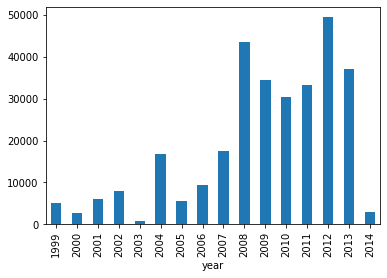

In [16]:
df.groupby("year").scientificName.count().plot.bar()